In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%pylab inline
import sys
sys.path.remove('/global/homes/d/dorislee/.local/lib/python2.7/site-packages/yt-3.2.dev0-py2.7-linux-x86_64.egg')
sys.path.remove('/global/homes/d/dorislee/.local/lib/python2.7/site-packages')
sys.path.append('/global/homes/d/dorislee/mypythonpackages')

Populating the interactive namespace from numpy and matplotlib


In [3]:
import yt
yt.funcs.mylog.setLevel(50) #coerce output null

In [4]:
cd ~/ramses/trunk/ramses/

/global/u2/d/dorislee/ramses/trunk/ramses


In [5]:
def plot_time(physical_quantity,timestep):
    ds= yt.load("bin/output_0000{0}/info_0000{0}.txt".format(timestep))
    proj = yt.ProjectionPlot(ds, "z",physical_quantity ,window_size=5)
    proj.set_cmap("density","rainbow")
    proj.annotate_velocity()
    proj.annotate_grids()
    proj.show()

In [14]:
# plot_time("density",1)


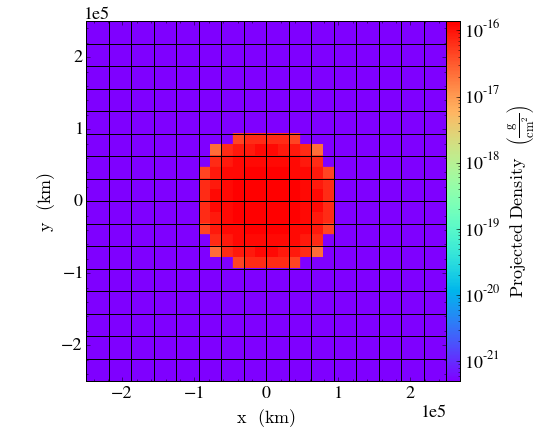


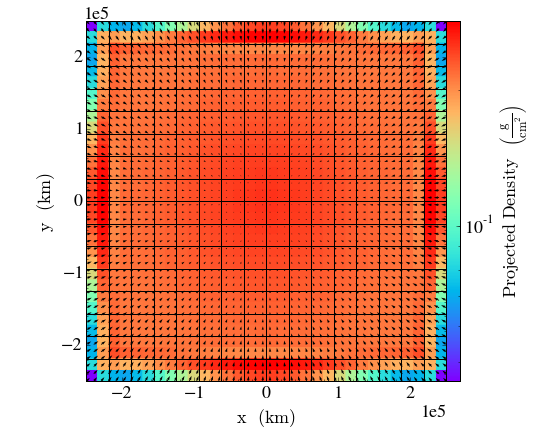


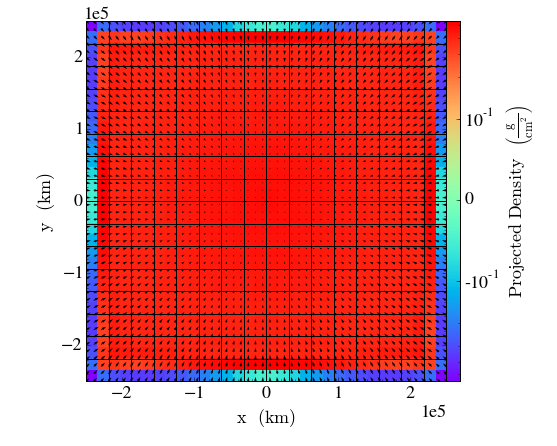

In [16]:
max_timestep = 4
for i in np.arange(1,max_timestep):
    plot_time("density",i)

I get negative potential energies , not sure if that's okay? 
We are using an outflow boundary condition , maybe I need a bigger box so that there is enough ambient gas?  

This is really weird, clearly this is collapsing but the density looks like it is spreading out

Looking at the pressure 


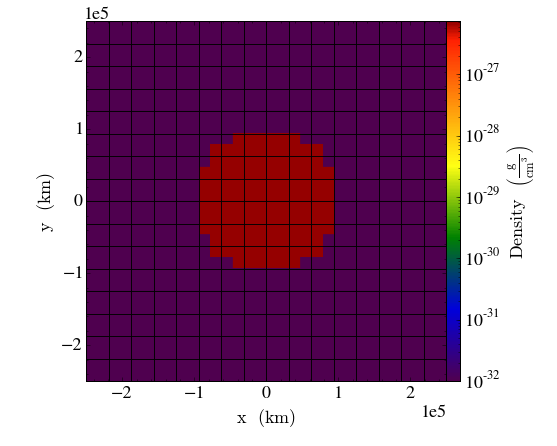

In [31]:
timestep=1
ds= yt.load("bin/output_0000{0}/info_0000{0}.txt".format(timestep))
p = yt.SlicePlot(ds, "z", "density",window_size=5)
p.annotate_grids()
p.annotate_velocity()
p.show()


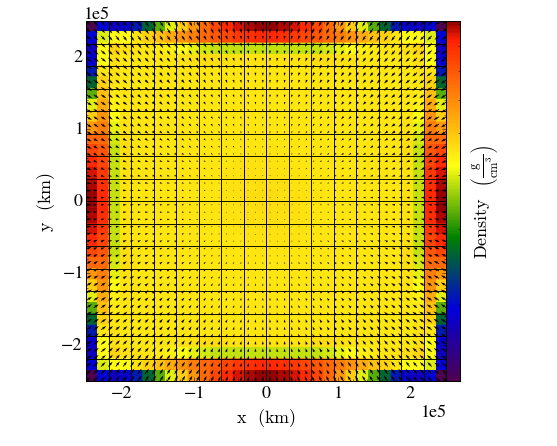

In [30]:
timestep=2
ds= yt.load("bin/output_0000{0}/info_0000{0}.txt".format(timestep))
p = yt.SlicePlot(ds, "z", "density",window_size=5)
p.annotate_grids()
p.annotate_velocity()
p.show()


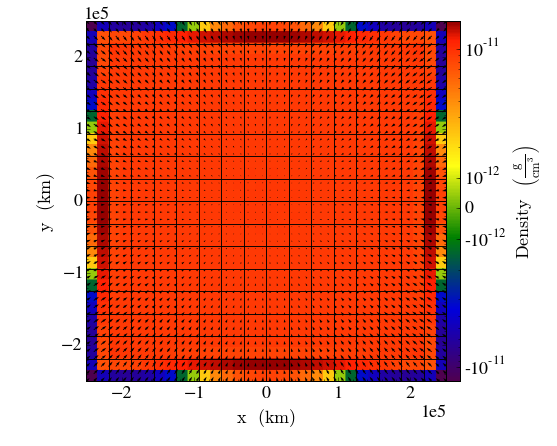

In [32]:
timestep=3
ds= yt.load("bin/output_0000{0}/info_0000{0}.txt".format(timestep))
p = yt.SlicePlot(ds, "z", "density",window_size=5)
p.annotate_grids()
p.annotate_velocity()
p.show()

There are regions that I am getting green and purple (negative densities )

In [ ]:
Taking out 
&INIT_PARAMS
nregion=1
region_type='square'
x_center=0.0
y_center=0.0
z_center=0.0
length_x=3500000000000000000.0
length_y=3500000000000000000.0
length_z=3500000000000000000.0
exp_region=2.0
d_region=0.0
u_region=0.0
v_region=0.0
w_region=0.0
p_region=0.0
/


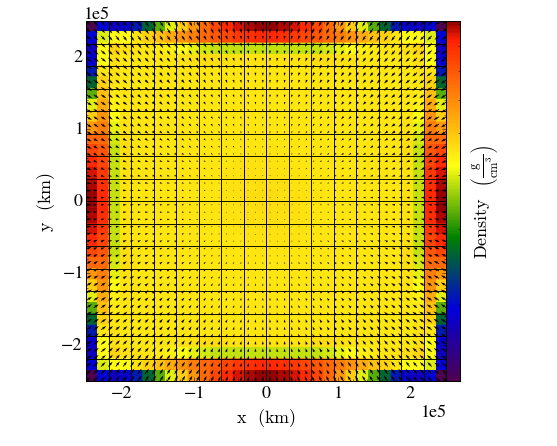

In [33]:
timestep=2
ds= yt.load("bin/output_0000{0}/info_0000{0}.txt".format(timestep))
p = yt.SlicePlot(ds, "z", "density",window_size=5)
p.annotate_grids()
p.annotate_velocity()
p.show()

No effect at all, all the things inside INIT_PARAM is default values


Changing number of ngridtotal to see if AMR could be more refined


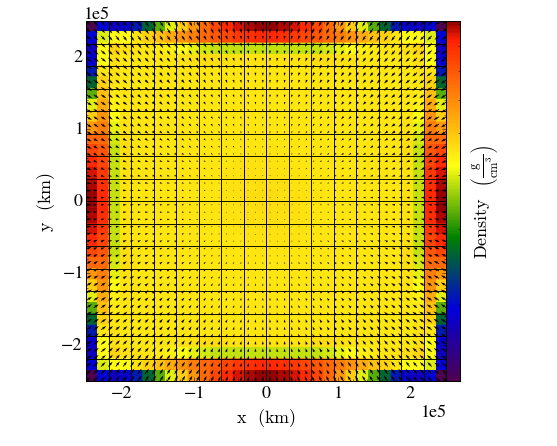

In [34]:
timestep=2
ds= yt.load("bin/output_0000{0}/info_0000{0}.txt".format(timestep))
p = yt.SlicePlot(ds, "z", "density",window_size=5)
p.annotate_grids()
p.annotate_velocity()
p.show()

What if we used level min  = 1 maybe the collapse doesn't require refinement until the fifth level

Tried debugging with gdb 

See if this is a problem for other levels

level 2 also crashes , but level 3 is okay 

In [42]:
timestep=1
ds= yt.load("bin/output_0000{0}/info_0000{0}.txt".format(timestep))
p = yt.SlicePlot(ds, "z", "density",window_size=5)
p.annotate_grids()
p.annotate_velocity()
p.show()

error: unpack requires a string argument of length 4

If I go to level 3 or level 4 then the code only gives 2 outputs. This tells me that the output stops because something gone bad in the code. Not too sure what, negative densities, negative energyies ..etc?

### ------------------------------------------------------------------------------------------------------------------------

As expected, density and cell mass is the same because the cell sizes are the same


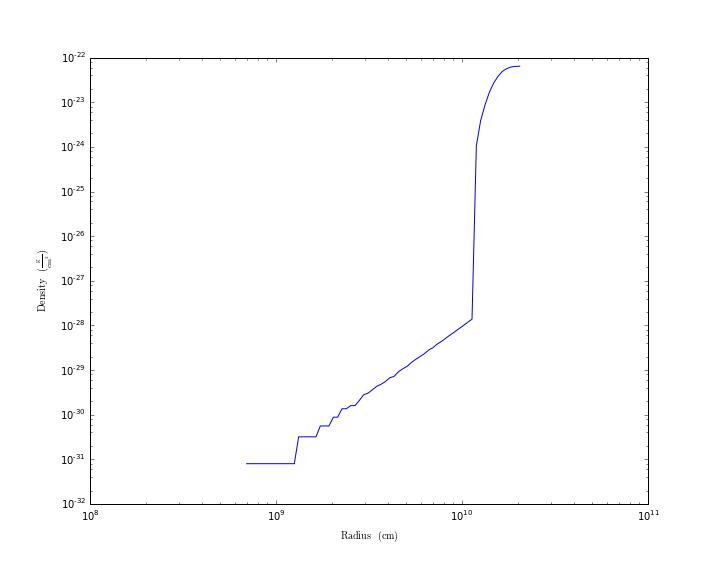

In [62]:
import yt
ds = yt.load("bin/output_00001/info_00001.txt")
sphere = ds.sphere([0.,0.,0.], (0.1, "pc"))
# plot = yt.ProfilePlot(sphere, "radius", ["cell_mass"],weight_field=None, accumulation=True)
# plot.show()
plot = yt.ProfilePlot(sphere, "radius", ["density"],weight_field=None, accumulation=True)
plot.show()

Just realized that I was doing a Projection plot and not a slice so the density may have been averaged or something 

In [63]:
def plot_slice(physical_quantity,timestep):
    ds= yt.load("bin/output_0000{0}/info_0000{0}.txt".format(timestep))
    proj = yt.SlicePlot(ds, "z",physical_quantity ,window_size=5)
    proj.set_cmap("density","rainbow")
    proj.annotate_velocity()
    proj.annotate_grids()
    proj.show()


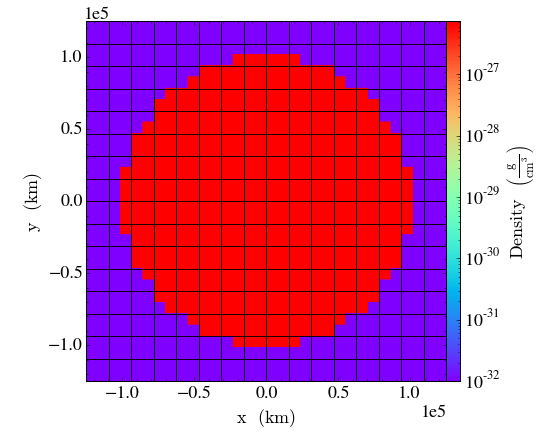


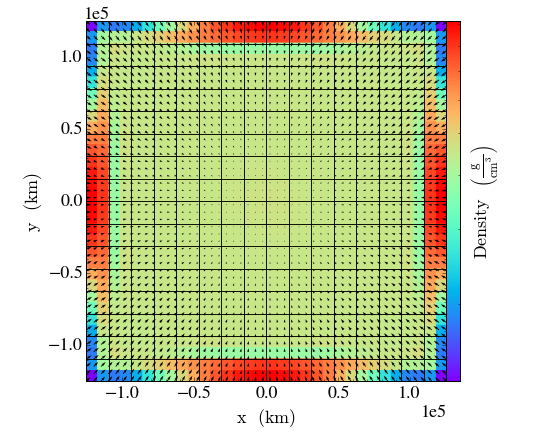


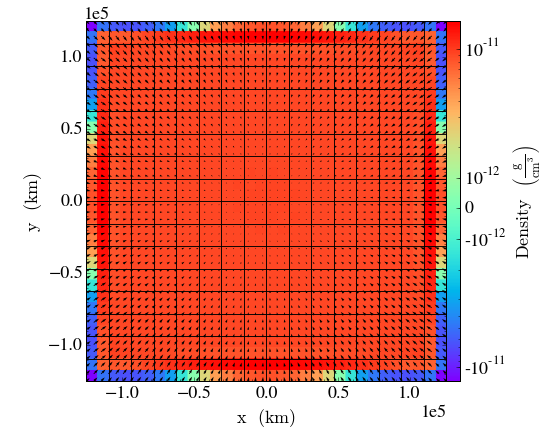

In [65]:
max_timestep = 4
for i in np.arange(1,max_timestep):
    plot_slice("density",i)

Yes, so it is different. Just noticed that boundary cells are actually getting negative densities, which is bad and unphysical...

In [96]:
def density_radial_profile(timestep):
    ds= yt.load("bin/output_0000{0}/info_0000{0}.txt".format(timestep))
    c = ds.find_max("density")[1]
    ax = 0 # Cut through x axis
    # cutting through the y0,z0 such that we hit the max density
    ray = ds.ortho_ray(ax, (c[1], c[2]))
    srt = np.argsort(ray['x'])
    plt.figure()
    plt.subplot(211)
    plt.loglog(np.array(ray['x'][srt]), np.array(ray['density'][srt]))
    plt.title("Timestep {}".format(timestep),fontsize=13)
    plt.xlabel("Radius",fontsize=13)
    plt.ylabel('Density',fontsize=13)
    # plt.subplot(212)

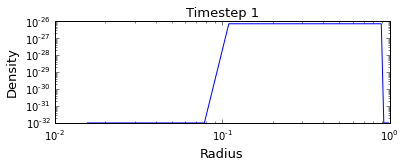

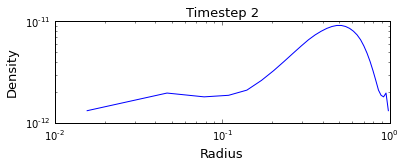

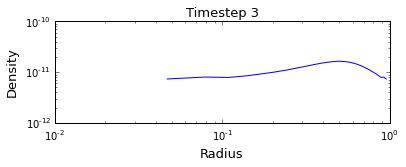

In [97]:
max_timestep = 4
for i in np.arange(1,max_timestep):
    density_radial_profile(i)

Trying to compare this with Fig 1 in Larson (1969)

I get negative potential energies , not sure if that's okay? 